# Pandas Quiz

Taken from [here](https://www.machinelearningplus.com/python/101-pandas-exercises-python/)

## 1. How to import pandas and check the version?

In [1]:
import pandas as pd

In [2]:
pd.__version__

'0.23.4'

## 2. How to create a series from a list, numpy array and dict?

In [3]:
import numpy as np
mylist = list('abcedfghijklmnopqrstuvwxyz')
myarr = np.arange(26)
mydict = dict(zip(mylist, myarr))

In [4]:
S1 = pd.Series(mylist)
print(S1.head())
print(type(S1))

0    a
1    b
2    c
3    e
4    d
dtype: object
<class 'pandas.core.series.Series'>


In [5]:
S1 = pd.Series(myarr)
print(S1.head())
print(type(S1))

0    0
1    1
2    2
3    3
4    4
dtype: int64
<class 'pandas.core.series.Series'>


In [6]:
S1 = pd.Series(mydict)
print(S1.head())
print(type(S1))

a    0
b    1
c    2
e    3
d    4
dtype: int64
<class 'pandas.core.series.Series'>


## 3. How to convert the index of a series into a column of a dataframe?

Convert the series ser into a dataframe with its index as another column on the dataframe.

In [7]:
mylist = list('abcedfghijklmnopqrstuvwxyz')
myarr = np.arange(26)
mydict = dict(zip(mylist, myarr))
ser = pd.Series(mydict)

In [8]:
ser.head()

a    0
b    1
c    2
e    3
d    4
dtype: int64

In [9]:
df = pd.DataFrame()
df['index'] = ser.index
df['values'] = ser.tolist()

In [10]:
df.head()

,index,values
0,a,0
1,b,1
2,c,2
3,e,3
4,d,4


### Best solution:

In [11]:
# Solution
df = ser.to_frame().reset_index()
print(df.head())

  index  0
0     a  0
1     b  1
2     c  2
3     e  3
4     d  4


## 4. How to combine many series to form a dataframe?

In [12]:
ser1 = pd.Series(list('abcedfghijklmnopqrstuvwxyz'))
ser2 = pd.Series(np.arange(26))

In [13]:
df = pd.concat( [ser1.to_frame(), ser2.to_frame()], axis=1)

In [14]:
df.head()

,0,0
0,a,0
1,b,1
2,c,2
3,e,3
4,d,4


### 5. How to assign name to the series’ index?

Difficulty Level: L1

Give a name to the series ser calling it ‘alphabets’.

In [15]:
ser = pd.Series(list('abcedfghijklmnopqrstuvwxyz'))

In [16]:
ser.name = 'alphabets'

In [17]:
ser.head()

0    a
1    b
2    c
3    e
4    d
Name: alphabets, dtype: object

## 6. How to get the items of series A not present in series B?

Difficulty Level: L2

From ser1 remove items present in ser2.

In [18]:
ser1 = pd.Series([1, 2, 3, 4, 5])
ser2 = pd.Series([4, 5, 6, 7, 8])

In [19]:
unique_ind = [x not in ser2.values for x in ser1.values ]
print(unique_ind)

[True, True, True, False, False]


In [20]:
ser3 = ser1.iloc[ [x not in ser2.values for x in ser1.values ] ]

In [21]:
ser3.head()

0    1
1    2
2    3
dtype: int64

## 8. How to get the minimum, 25th percentile, median, 75th, and max of a numeric series?

In [22]:
ser = pd.Series(np.random.normal(10, 5, 25))
ser.head()

0     5.611840
1    20.634435
2    10.766913
3    12.840689
4    12.840196
dtype: float64

In [23]:
np.percentile(ser, q=[0, 25, 50, 75, 100])

array([ 2.30660361,  8.2498876 , 11.96402734, 14.43130485, 21.45811633])

## 9. How to get frequency counts of unique items of a series?

Difficulty Level: L1

In [24]:
ser.value_counts()

5.611840     1
12.840196    1
4.124830     1
4.004094     1
12.324104    1
15.823187    1
20.586213    1
9.522217     1
20.634435    1
8.986973     1
20.387867    1
8.249888     1
2.306604     1
3.534395     1
11.244910    1
11.964027    1
18.463671    1
21.458116    1
14.431305    1
10.766913    1
11.534293    1
13.290320    1
7.024216     1
12.840689    1
14.332810    1
dtype: int64

## 10. How to keep only top 2 most frequent values as it is and replace everything else as ‘Other’?

Difficulty Level: L2

From ser, keep the top 2 most frequent items as it is and replace everything else as ‘Other’.

In [25]:
np.random.RandomState(100)
ser = pd.Series(np.random.randint(1, 5, [12]))
ser.head()

0    1
1    1
2    1
3    2
4    4
dtype: int64

In [26]:
ser.value_counts()

1    4
3    3
2    3
4    2
dtype: int64

In [27]:
ser2 = ser.apply(lambda x: x if x in ser.value_counts()[:2] else 'Other' )
ser2.head(20)


0         1
1         1
2         1
3     Other
4     Other
5     Other
6         1
7         3
8     Other
9     Other
10        3
11        3
dtype: object

## 11. How to bin a numeric series to 10 groups of equal size?

Difficulty Level: L2

Bin the series ser into 10 equal deciles and replace the values with the bin name.

In [70]:
ser = pd.Series(np.random.random(20))

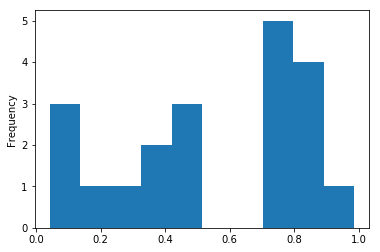

In [48]:
ser.plot(kind='hist')

In [71]:
pd.qcut(ser, q=[0, .10, .20, .3, .4, .5, .6, .7, .8, .9, 1], 
        labels=['1st', '2nd', '3rd', '4th', '5th', '6th', '7th', '8th', '9th', '10th'])

0      7th
1     10th
2     10th
3      4th
4      4th
5      3rd
6      6th
7      8th
8      3rd
9      8th
10     2nd
11     2nd
12     9th
13     1st
14     5th
15     5th
16     9th
17     6th
18     7th
19     1st
dtype: category
Categories (10, object): [1st < 2nd < 3rd < 4th ... 7th < 8th < 9th < 10th]

## 12. How to convert a numpy array to a dataframe of given shape? (L1)

Difficulty Level: L1

Reshape the series ser into a dataframe with 7 rows and 5 columns

In [79]:
ser = np.random.randint(1,10,20)
print(ser)

[7 3 4 3 9 9 1 5 9 4 1 7 4 9 6 2 2 6 2 1]


In [80]:
df = pd.DataFrame( data = ser )

## 13. How to find the positions of numbers that are multiples of 3 from a series?

Difficulty Level: L2

Find the positions of numbers that are multiples of 3 from ser.

In [92]:
ser = pd.Series(np.random.randint(1, 10, 7))
print(ser)

0    2
1    2
2    1
3    4
4    7
5    9
6    4
dtype: int64


In [93]:
mult3_idx = ser.loc[ ser%3==0 ].index

In [94]:
print(mult3_idx)

Int64Index([5], dtype='int64')


## 14. How to extract items at given positions from a series

Difficulty Level: L1

From ser, extract the items at positions in list pos.

In [98]:
ser = pd.Series(list('abcdefghijklmnopqrstuvwxyz'))
pos = [0, 4, 8, 14, 20]

In [99]:
ser[pos]

0     a
4     e
8     i
14    o
20    u
dtype: object

## 15. How to stack two series vertically and horizontally?

Difficulty Level: L1

Stack ser1 and ser2 vertically and horizontally (to form a dataframe).

In [100]:
ser1 = pd.Series(range(5))
ser2 = pd.Series(list('abcde'))

In [101]:
print(pd.concat([ser1, ser2], axis=1))

   0  1
0  0  a
1  1  b
2  2  c
3  3  d
4  4  e


In [102]:
print(pd.concat([ser1, ser2], axis=0))

0    0
1    1
2    2
3    3
4    4
0    a
1    b
2    c
3    d
4    e
dtype: object


## 16. How to get the positions of items of series A in another series B?

Difficulty Level: L2

Get the positions of items of ser2 in ser1 as a list.

In [104]:
ser1 = pd.Series([10, 9, 6, 5, 3, 1, 12, 8, 13])
ser2 = pd.Series([1, 3, 10, 13])

In [109]:
ser1.loc[ser1.apply(lambda x: x in ser2.values)]

0    10
4     3
5     1
8    13
dtype: int64

## 17. How to compute the mean squared error on a truth and predicted series?

Difficulty Level: L2

Compute the mean squared error of truth and pred series.

In [110]:
truth = pd.Series(range(10))
pred = pd.Series(range(10)) + np.random.random(10)

In [113]:
np.std(pred-truth)

0.29867548710147523

In [117]:
np.mean((pred-truth)**2)

0.3326350297674332

## 18. How to convert the first character of each element in a series to uppercase?

Difficulty Level: L2

Change the first character of each word to upper case in each word of ser.

In [121]:
ser = pd.Series(['how', 'to', 'kick', 'ass?'])

In [122]:
print(ser.apply(lambda x: x[0].upper() + x[1:] ))

0     How
1      To
2    Kick
3    Ass?
dtype: object


In [123]:
ser.str.title()

0     How
1      To
2    Kick
3    Ass?
dtype: object

## 19. How to calculate the number of characters in each word in a series?

Difficulty Level: L2

In [125]:
print( [len(x) for x in ser])

[3, 2, 4, 4]


## 20. How to compute difference of differences between consequtive numbers of a series?

Difficulty Level: L1

Difference of differences between the consequtive numbers of ser.

In [126]:
ser = pd.Series([1, 3, 6, 10, 15, 21, 27, 35])

In [127]:
df = pd.DataFrame(data = ser, columns=['numbers'])

In [130]:
diff = pd.Series([np.nan, np.nan])
for i in range(2, ser.shape[0]):
    diff[i] = ser[i-1] - ser[i-2]

In [132]:
diff.values

array([nan, nan,  2.,  3.,  4.,  5.,  6.,  6.])

In [135]:
ser.diff(periods=1)

0    NaN
1    2.0
2    3.0
3    4.0
4    5.0
5    6.0
6    6.0
7    8.0
dtype: float64